In [ ]:
!pip install --force-reinstall numpy

In [ ]:
!pip install "numpy < 2.0"

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## **Data Preparation**

### **Loading and inspecting data**

In [5]:
machine_settings = pd.read_csv(r"C:\Users\agrim\OneDrive\Desktop\Semester 5\DSML\Task1\Machine_Settings_Log_01.csv")
production_log =  pd.read_csv(r"C:\Users\agrim\OneDrive\Desktop\Semester 5\DSML\Task1\Production_Log_01.csv")

In [7]:
machine_settings.head(5)

,configuration_log_ID,gear,rotation_speed
0,1,2,122.121415
1,2,1,111.977476
2,3,1,137.268544
3,4,2,125.719071
4,5,1,134.710713


In [9]:
production_log.head(5)

,id,width,height,ionizationclass,FluxCompensation,pressure,karma,modulation,configuration_log_ID,weight_in_kg,weight_in_g,error,error_type,Quality,reflectionScore,distortion,nicesness,smartness,multideminsionality,roughness
0,1,137.419169,44.326218,C,IV,103.937207,976.538993,98.309438,1,837068.270898,8.370683e+08,no,NaN,95.489138,736.826681,49.666361,139.496837,2964.217002,no,123.202181
1,2,98.706037,41.619531,A,II,101.177877,1031.806826,102.748068,2,435504.324849,4.355043e+08,no,NaN,98.262642,694.881024,52.826310,100.380138,2733.298369,yes,111.040858
2,3,117.262568,41.421088,A,III,99.381956,840.246668,99.451354,3,599570.696236,5.995707e+08,no,NaN,98.472489,683.459298,51.967423,115.995772,2716.279965,no,138.439571
3,4,122.657252,41.202308,A,I,101.833664,964.391122,101.022948,4,649889.744140,6.498897e+08,no,NaN,97.107023,699.626001,47.626823,121.383895,2694.883523,no,125.939831
4,5,118.085366,43.418485,C,I,95.246304,859.331870,97.698503,5,605444.403997,6.054444e+08,no,NaN,92.994235,650.253900,47.420237,118.633440,2885.260257,no,135.123613


**The following columns can not be used in the predictive model, since they are properties of the final product after the machine is used. Except for the target variable, weight_in_kg, I will drop these columns. I will also drop the weight_in_g column, since it is redundant data.**


**Not using these columns as features ensures Data Leakage is prevented (by not exposing features recorded AFTER production)**

- error
- error_type
- quality
- reflectionScore
- distortion
- nicesness
- smartness
- multideminsionality
- roughness

### **merging datasets and removing post-production columns**

In [13]:
df_original = machine_settings.set_index('configuration_log_ID').join(production_log.set_index('configuration_log_ID'), how = 'inner')

In [15]:
df_original.head(5)

,gear,rotation_speed,id,width,height,ionizationclass,FluxCompensation,pressure,karma,modulation,...,weight_in_g,error,error_type,Quality,reflectionScore,distortion,nicesness,smartness,multideminsionality,roughness
configuration_log_ID,,,,,,,,,,,,,,,,,,,,,
1,2,122.121415,1,137.419169,44.326218,C,IV,103.937207,976.538993,98.309438,...,8.370683e+08,no,NaN,95.489138,736.826681,49.666361,139.496837,2964.217002,no,123.202181
2,1,111.977476,2,98.706037,41.619531,A,II,101.177877,1031.806826,102.748068,...,4.355043e+08,no,NaN,98.262642,694.881024,52.826310,100.380138,2733.298369,yes,111.040858
3,1,137.268544,3,117.262568,41.421088,A,III,99.381956,840.246668,99.451354,...,5.995707e+08,no,NaN,98.472489,683.459298,51.967423,115.995772,2716.279965,no,138.439571
4,2,125.719071,4,122.657252,41.202308,A,I,101.833664,964.391122,101.022948,...,6.498897e+08,no,NaN,97.107023,699.626001,47.626823,121.383895,2694.883523,no,125.939831
5,1,134.710713,5,118.085366,43.418485,C,I,95.246304,859.331870,97.698503,...,6.054444e+08,no,NaN,92.994235,650.253900,47.420237,118.633440,2885.260257,no,135.123613


In [17]:
df_original.drop(columns = ['id', 'weight_in_g', 'error', 'error_type', 'Quality', 'reflectionScore', 'distortion', 'nicesness', 'smartness', 'multideminsionality', 'roughness'], inplace = True, axis = 1)

In [19]:
df_original.head(2)

,gear,rotation_speed,width,height,ionizationclass,FluxCompensation,pressure,karma,modulation,weight_in_kg
configuration_log_ID,,,,,,,,,,
1,2,122.121415,137.419169,44.326218,C,IV,103.937207,976.538993,98.309438,837068.270898
2,1,111.977476,98.706037,41.619531,A,II,101.177877,1031.806826,102.748068,435504.324849


<hr>

## **Target Variable Analysis and Cleaning**

### **Outlier Detection and Removal**

In [24]:
df_copy = df_original.copy(deep = True)
df_copy.head(2)

,gear,rotation_speed,width,height,ionizationclass,FluxCompensation,pressure,karma,modulation,weight_in_kg
configuration_log_ID,,,,,,,,,,
1,2,122.121415,137.419169,44.326218,C,IV,103.937207,976.538993,98.309438,837068.270898
2,1,111.977476,98.706037,41.619531,A,II,101.177877,1031.806826,102.748068,435504.324849


In [26]:
# define target variable and basic statistics of it

target = df_copy['weight_in_kg']

# Target Variable Analysis
print(target.describe())
print()
print('Median: ', target.median())

count    1.000000e+04
mean     8.488496e+18
std      1.897801e+20
min      3.768185e+04
25%      3.965822e+05
50%      5.174675e+05
75%      6.502447e+05
max      4.475432e+21
Name: weight_in_kg, dtype: float64

Median:  517467.4713101045


**From the above statistics, we can infer the following:**

- the 25th, 50, and 75th percentile show that most of the values are in the hundred thousands range (4e5 to 6.5e5)

- The mean and standard deviation seem to be abnormally high. This hints that there may be a small number of extremely high values (corrupted values).

- The maximum value in the column seems to be corrupted. (4.475e21) Corrupted Values could be due to faulty method of recording the weight_in_kg or a simple data entry error, if it was manually recorded.

- Due to corrupted values, mean is also extremely high (not a realistic product weight)

- large std value shows high variance

- The min, 25% (Q1), 50% (median), and 75% (Q3) represent realistic values.

- **Due to corrupted values, mean and std are also affected**

- **To remove corrupted values, an upper bound will be used. Large values (maybe outliers) are not removed, because they can show production mistakes or cost risk**

In [29]:
# cehcking for Nan

df_copy.isna().sum()

gear                0
rotation_speed      0
width               0
height              0
ionizationclass     0
FluxCompensation    0
pressure            0
karma               0
modulation          0
weight_in_kg        0
dtype: int64

In [31]:
df_copy.isnull().sum()

gear                0
rotation_speed      0
width               0
height              0
ionizationclass     0
FluxCompensation    0
pressure            0
karma               0
modulation          0
weight_in_kg        0
dtype: int64

In [33]:
rows_before_cleaning = len(df_copy)
# drop rows where target is na
df_copy.dropna(subset = ['weight_in_kg'], inplace = True)
print(rows_before_cleaning)

10000


In [35]:
# REMOVING CORRUPTED VALUES

Q1 = df_copy['weight_in_kg'].quantile(0.25)
Q3 = df_copy['weight_in_kg'].quantile(0.75)

IQR = Q3 - Q1
# interquartile range

IQR_multiplier = 5.0
# 5 chosen to ensure outliers remain, only physically impossible values will be filtered out
# helps increase range when filtering values of weight

upper_bound = Q3 + (IQR_multiplier * IQR)
# selects a range from Q3 to 5IQR

In [37]:
# applying upper bound filter and lower bound = 0 just to make sure no weight values were mistakenly negative

df_cleaned = df_copy[(df_copy['weight_in_kg'] >= 0) & (df_copy['weight_in_kg'] <= upper_bound)].copy()

In [39]:
print('length after removing corrupted values: ', len(df_cleaned), '\n')
df_cleaned.head(3)

length after removing corrupted values:  9980 



,gear,rotation_speed,width,height,ionizationclass,FluxCompensation,pressure,karma,modulation,weight_in_kg
configuration_log_ID,,,,,,,,,,
1,2,122.121415,137.419169,44.326218,C,IV,103.937207,976.538993,98.309438,837068.270898
2,1,111.977476,98.706037,41.619531,A,II,101.177877,1031.806826,102.748068,435504.324849
3,1,137.268544,117.262568,41.421088,A,III,99.381956,840.246668,99.451354,599570.696236


<hr>

## **EDA + visualization**

### **Goal of this EDA:**

- Analyze Feature Distributions: See the range and spread of numerical features, and analyze categorical variables also.

- Determine Feature-Target Relationship: Visually confirm which pre-production settings have the strongest correlation with the target weight.

In [44]:
df_cleaned.head(2)

,gear,rotation_speed,width,height,ionizationclass,FluxCompensation,pressure,karma,modulation,weight_in_kg
configuration_log_ID,,,,,,,,,,
1,2,122.121415,137.419169,44.326218,C,IV,103.937207,976.538993,98.309438,837068.270898
2,1,111.977476,98.706037,41.619531,A,II,101.177877,1031.806826,102.748068,435504.324849


### **Correlation Analysis (Numerical features)**

In [47]:
numeric_cols = df_cleaned.select_dtypes(include = ['int64', 'float64'])
print(numeric_cols.columns)
# note: includes target also

Index(['gear', 'rotation_speed', 'width', 'height', 'pressure', 'karma',
       'modulation', 'weight_in_kg'],
      dtype='object')


In [49]:
correlation_matrix = numeric_cols.corr()
correlation_matrix

,gear,rotation_speed,width,height,pressure,karma,modulation,weight_in_kg
gear,1.000000,0.026940,-0.007156,-0.001055,-0.003024,-0.011217,0.014398,-0.006837
rotation_speed,0.026940,1.000000,-0.000712,0.005812,0.002411,-0.000708,0.004597,0.002283
width,-0.007156,-0.000712,1.000000,-0.006551,-0.007707,0.014000,0.007288,0.979350
height,-0.001055,0.005812,-0.006551,1.000000,-0.011650,-0.006416,-0.010034,0.124248
pressure,-0.003024,0.002411,-0.007707,-0.011650,1.000000,0.006511,0.014047,-0.010971
karma,-0.011217,-0.000708,0.014000,-0.006416,0.006511,1.000000,0.000334,0.013690
modulation,0.014398,0.004597,0.007288,-0.010034,0.014047,0.000334,1.000000,0.006011
weight_in_kg,-0.006837,0.002283,0.979350,0.124248,-0.010971,0.013690,0.006011,1.000000


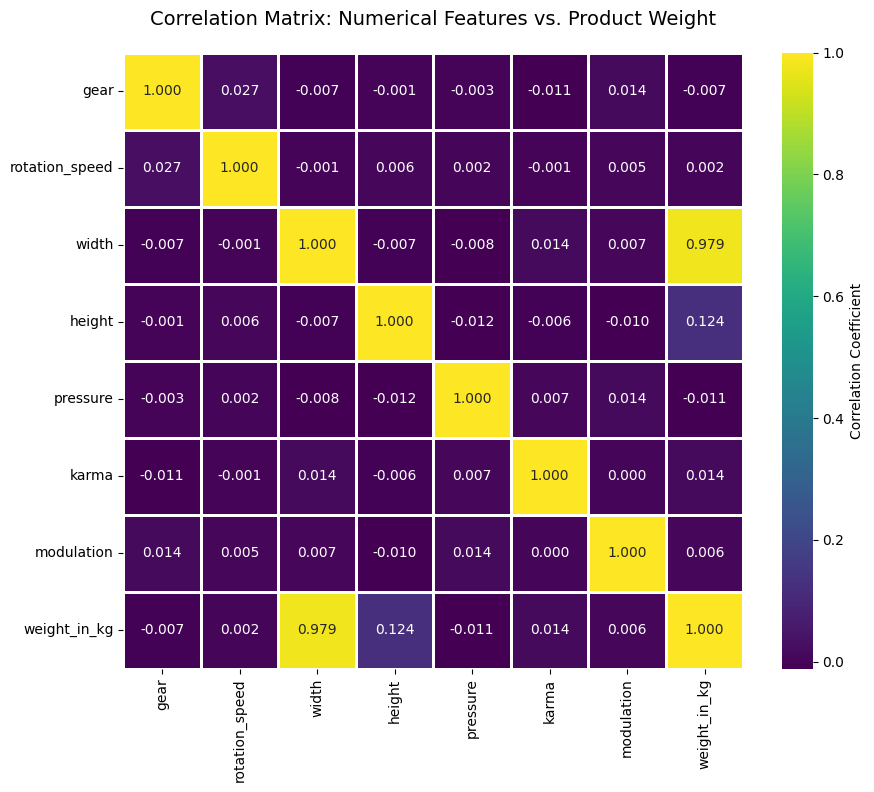

In [51]:
plt.figure(figsize = (10,8))

sns.heatmap(correlation_matrix, annot = True, cmap = 'viridis', fmt = '.3f', linewidths = 2.0, cbar_kws = {'label' : 'Correlation Coefficient'})
plt.title('Correlation Matrix: Numerical Features vs. Product Weight', fontsize=14, pad = 20)
plt.show() 

- **Width shows strong positive correlation with weight_in_kg.**
- **Compared to other features (except for weight), height also shows some correlation, though it weakly positive, it is still more than others.**

### **Categorical Features Analysis (Box Plots)**

C:\Users\agrim\AppData\Local\Temp\ipykernel_37744\2911107206.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'ionizationclass', y = df_cleaned['weight_in_kg'], data = df_cleaned, ax = axes[0], palette='Set2', showfliers=False)
C:\Users\agrim\AppData\Local\Temp\ipykernel_37744\2911107206.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'FluxCompensation', y = df_cleaned['weight_in_kg'], data = df_cleaned, ax = axes[1], palette='Set3', showfliers=False)


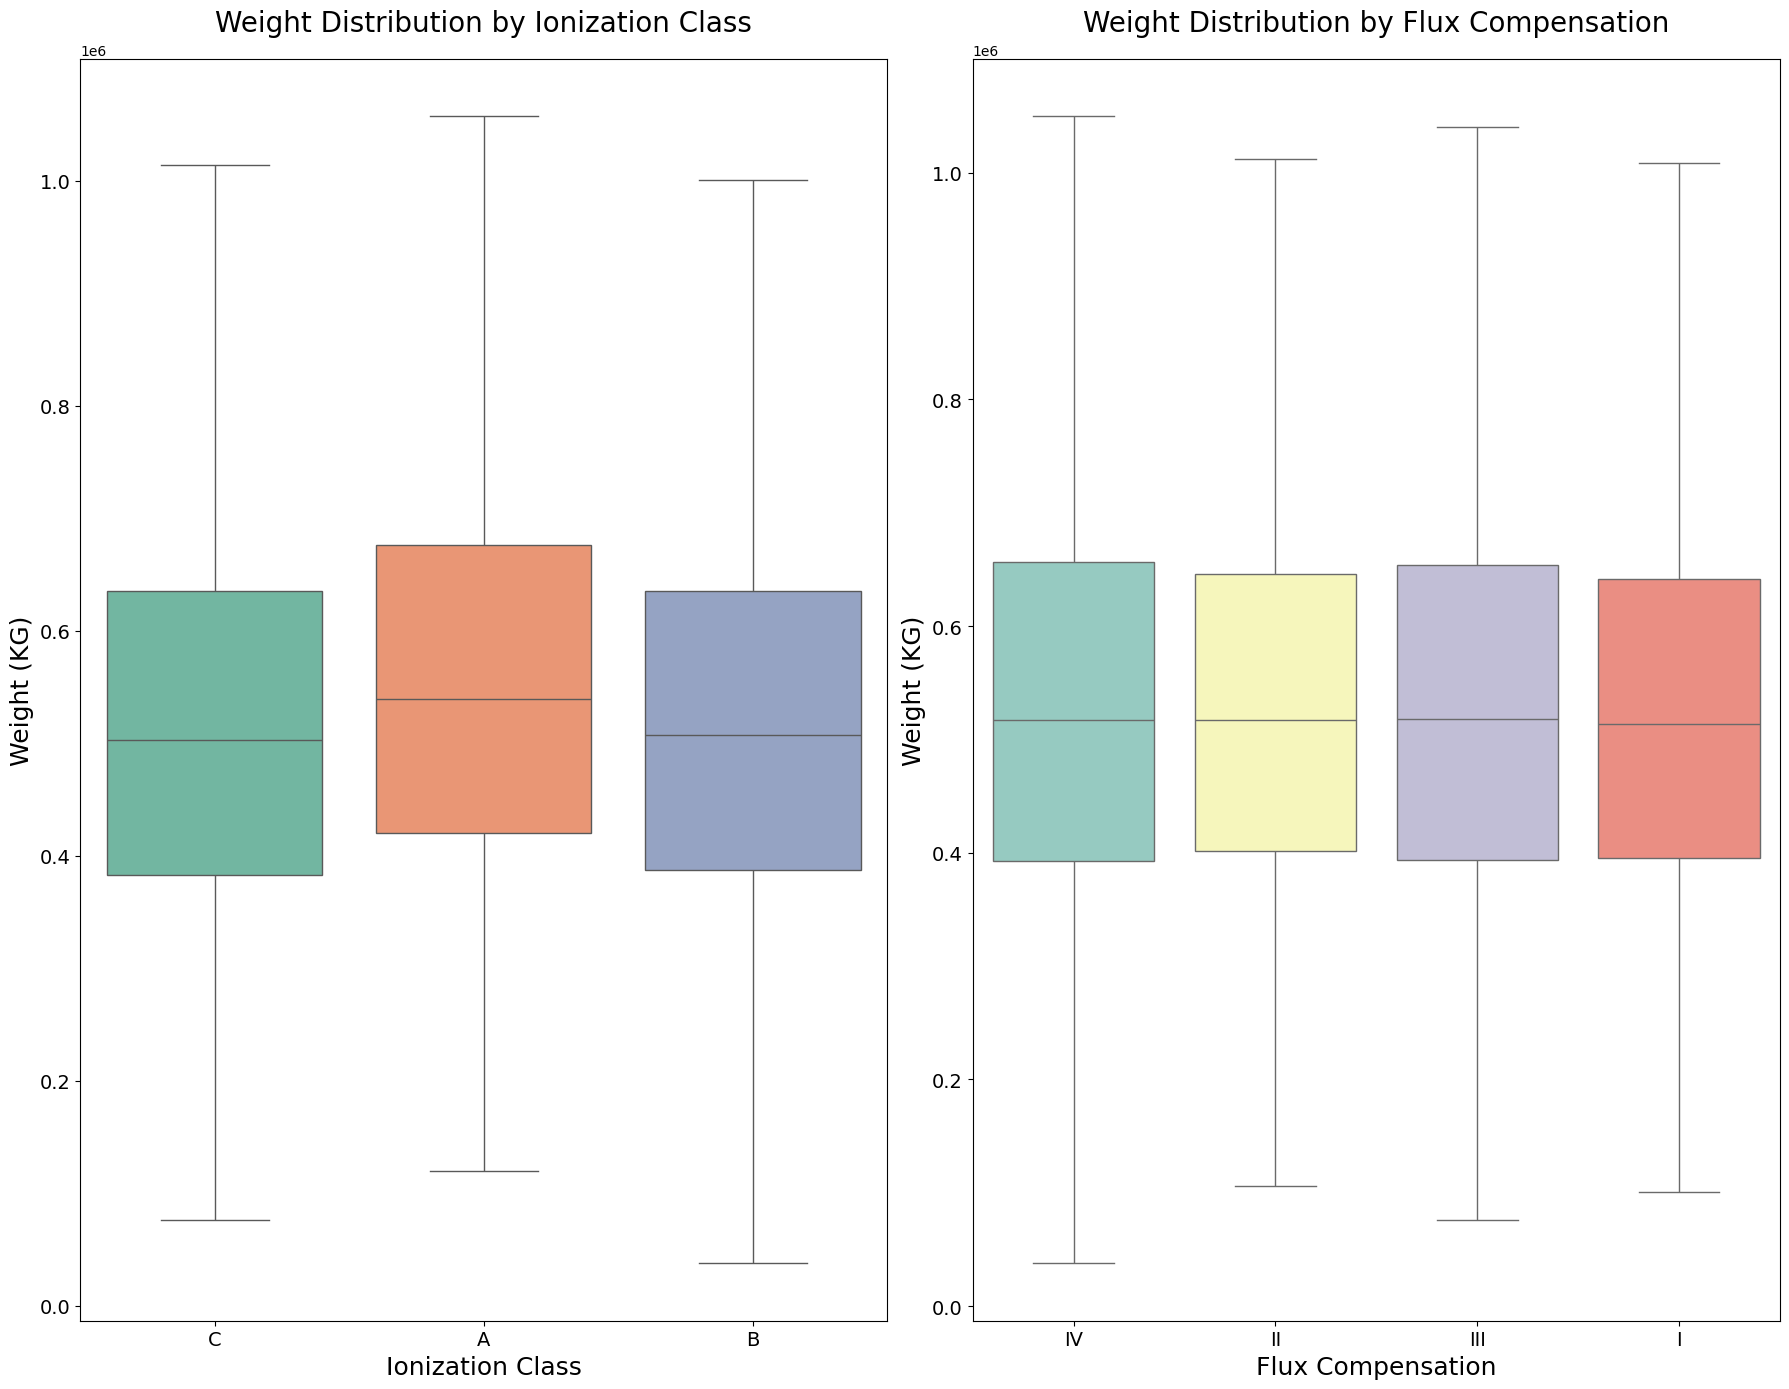

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(18, 14))

# Plot 1: Ionization Class vs. Weight

sns.boxplot(x = 'ionizationclass', y = df_cleaned['weight_in_kg'], data = df_cleaned, ax = axes[0], palette='Set2', showfliers=False) 
axes[0].set_title('Weight Distribution by Ionization Class', fontsize = 20, pad = 20)
axes[0].set_xlabel('Ionization Class', fontsize = 18)
axes[0].set_ylabel('Weight (KG)', fontsize = 18)

# Set large tick label size (14)
axes[0].tick_params(axis='x', labelsize=14)
axes[0].tick_params(axis='y', labelsize=14)


# Plot 2: Flux Compensation vs. Weight

sns.boxplot(x = 'FluxCompensation', y = df_cleaned['weight_in_kg'], data = df_cleaned, ax = axes[1], palette='Set3', showfliers=False)
axes[1].set_title('Weight Distribution by Flux Compensation', fontsize = 20, pad = 20)
axes[1].set_xlabel('Flux Compensation', fontsize = 18)
axes[1].set_ylabel('Weight (KG)', fontsize = 18)

# Set large tick label size (14)
axes[1].tick_params(axis='x', labelsize=14)
axes[1].tick_params(axis='y', labelsize=14)

plt.tight_layout()
plt.show()

### **Numerical Features Distribution**

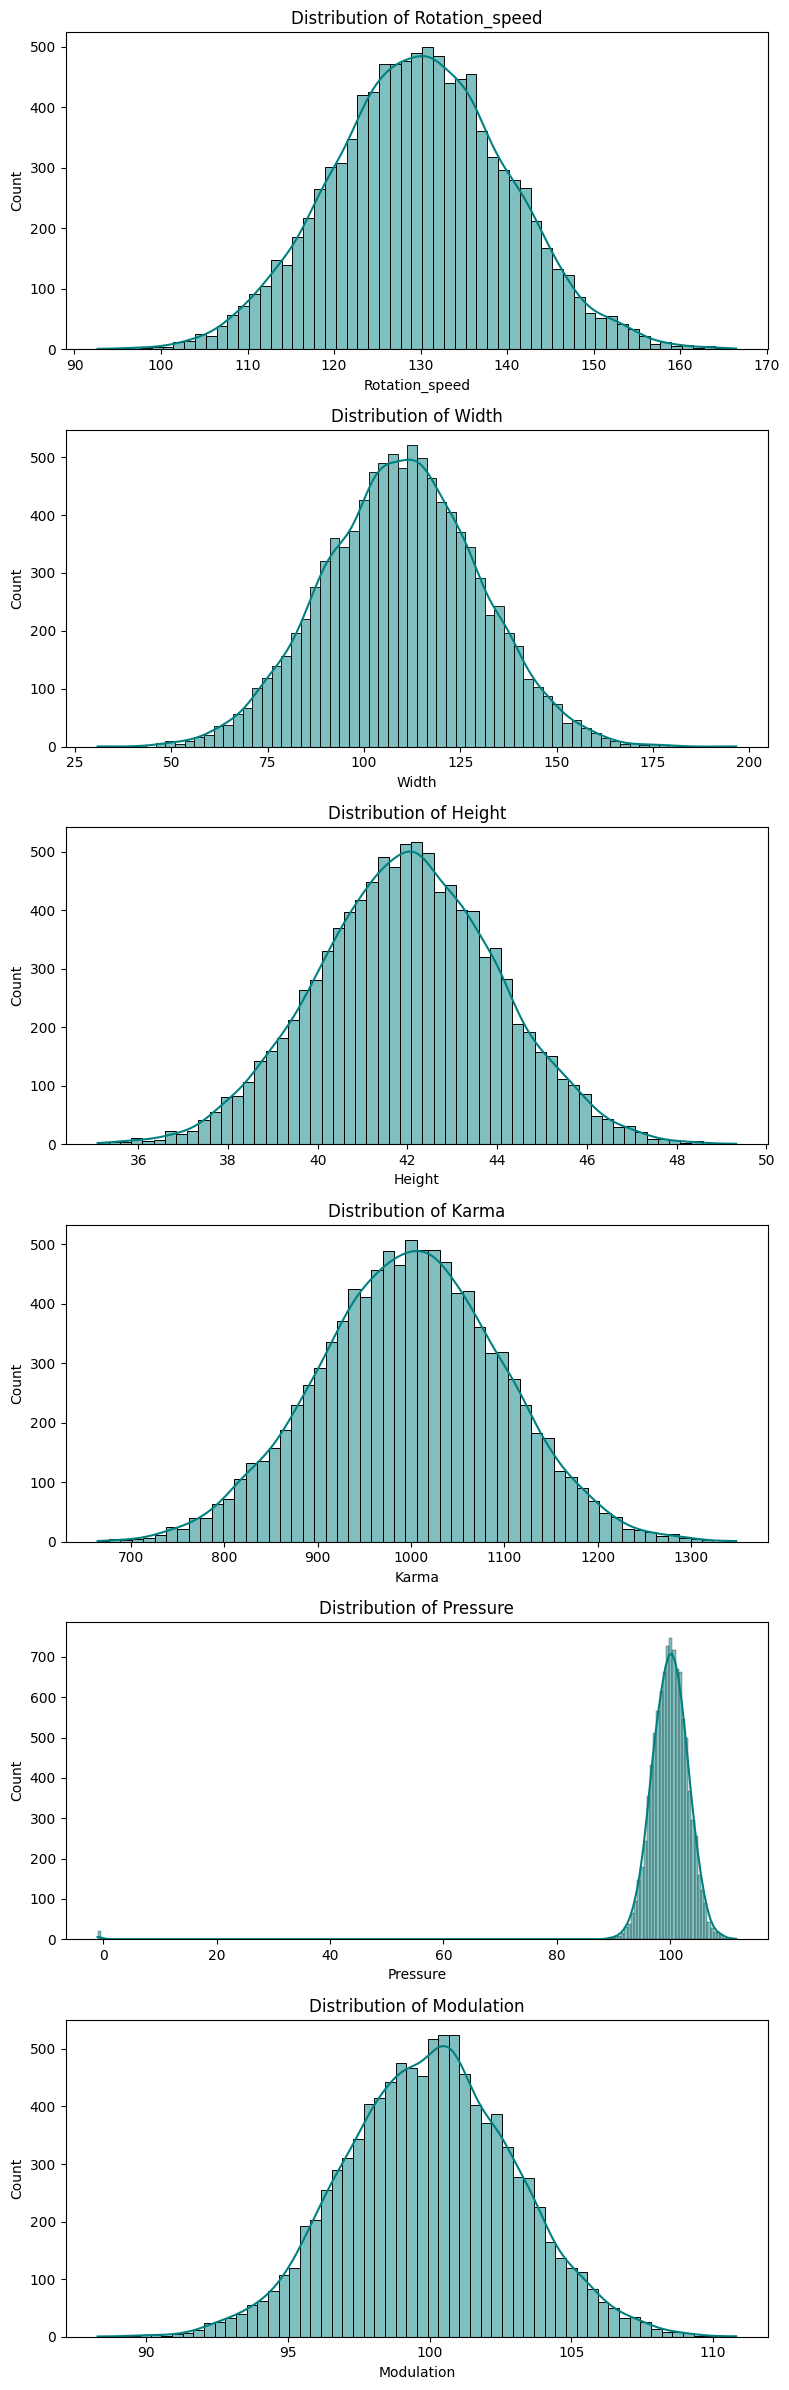

In [57]:
# Select numerical features for visualization

features_to_plot = ['rotation_speed', 'width', 'height', 'karma', 'pressure', 'modulation']

n_plots = len(features_to_plot)

fig, axes = plt.subplots(n_plots, 1, figsize=(8, 4 * n_plots))

for i, feature in enumerate(features_to_plot):
    sns.histplot(x = df_cleaned[feature], ax = axes[i], kde = True, color = 'teal')
    
    axes[i].set_title(f'Distribution of {feature.capitalize()}', fontsize=12)
    axes[i].set_xlabel(feature.capitalize())
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

<hr>

## **Encoding Categorical Variables**

In [61]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9980 entries, 1 to 10000
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gear              9980 non-null   int64  
 1   rotation_speed    9980 non-null   float64
 2   width             9980 non-null   float64
 3   height            9980 non-null   float64
 4   ionizationclass   9980 non-null   object 
 5   FluxCompensation  9980 non-null   object 
 6   pressure          9980 non-null   float64
 7   karma             9980 non-null   float64
 8   modulation        9980 non-null   float64
 9   weight_in_kg      9980 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 857.7+ KB


In [62]:
df_encoded = pd.get_dummies(df_cleaned, columns = ['ionizationclass', 'FluxCompensation'], drop_first = True)
df_encoded.head(2)

,gear,rotation_speed,width,height,pressure,karma,modulation,weight_in_kg,ionizationclass_B,ionizationclass_C,FluxCompensation_II,FluxCompensation_III,FluxCompensation_IV
configuration_log_ID,,,,,,,,,,,,,
1,2,122.121415,137.419169,44.326218,103.937207,976.538993,98.309438,837068.270898,False,True,False,False,True
2,1,111.977476,98.706037,41.619531,101.177877,1031.806826,102.748068,435504.324849,False,False,True,False,False


**NOTE**

- An advantage of using Random Forest here is that features like 'gear' that have dtype int, but actually behave as categorical variables, do not need to be encoded.
- Since gear only has two values (1 and 2), a decision tree in the Random Forest model simply creates a split based on this value (e.g., gear <= 1.5 vs. gear > 1.5). This split is the same as using a one-hot encoded binary column.

- Therefore, for a Random Forest model, leaving a binary categorical feature encoded as 0/1 or 1/2 is okay and efficient.

In [64]:
Y = df_encoded['weight_in_kg']

In [65]:
df_encoded.drop(columns = ['weight_in_kg'], axis = 1, inplace = True)

In [66]:
df_encoded.head(2)

,gear,rotation_speed,width,height,pressure,karma,modulation,ionizationclass_B,ionizationclass_C,FluxCompensation_II,FluxCompensation_III,FluxCompensation_IV
configuration_log_ID,,,,,,,,,,,,
1,2,122.121415,137.419169,44.326218,103.937207,976.538993,98.309438,False,True,False,False,True
2,1,111.977476,98.706037,41.619531,101.177877,1031.806826,102.748068,False,False,True,False,False


## **Model Training And Evaluation**

In [68]:
from sklearn.model_selection import train_test_split
from  sklearn.ensemble import RandomForestRegressor

X = df_encoded

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, train_size = 0.8, random_state = 50)

rf_regressor = RandomForestRegressor(n_estimators = 200, max_depth = 15, random_state = 50, n_jobs = -1)

In [69]:
rf_regressor.fit(X_train, Y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [70]:
Y_predicted = rf_regressor.predict(X_test)

In [71]:
# Calculating evaluation metrics

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

MAE = mean_absolute_error(Y_test, Y_predicted)
RMSE = np.sqrt(mean_squared_error(Y_test, Y_predicted))
R2 = r2_score(Y_test, Y_predicted)

# pass always actual then predicted to mae,mse,r2

In [72]:
print("\nFinal Model Evaluation (Weight Prediction) - 80/20 Split Metrics\n")
print(f"R-squared Score (R²): {R2:.4f}")
print(f"Mean Absolute Error (MAE): {MAE:.4f}")
print(f"Root Mean Squared Error (RMSE): {RMSE:.4f}")


Final Model Evaluation (Weight Prediction) - 80/20 Split Metrics

R-squared Score (R²): 0.9978
Mean Absolute Error (MAE): 5453.3769
Root Mean Squared Error (RMSE): 8600.9768


## **Metrics Visualization**

**Feature Importance Bar**

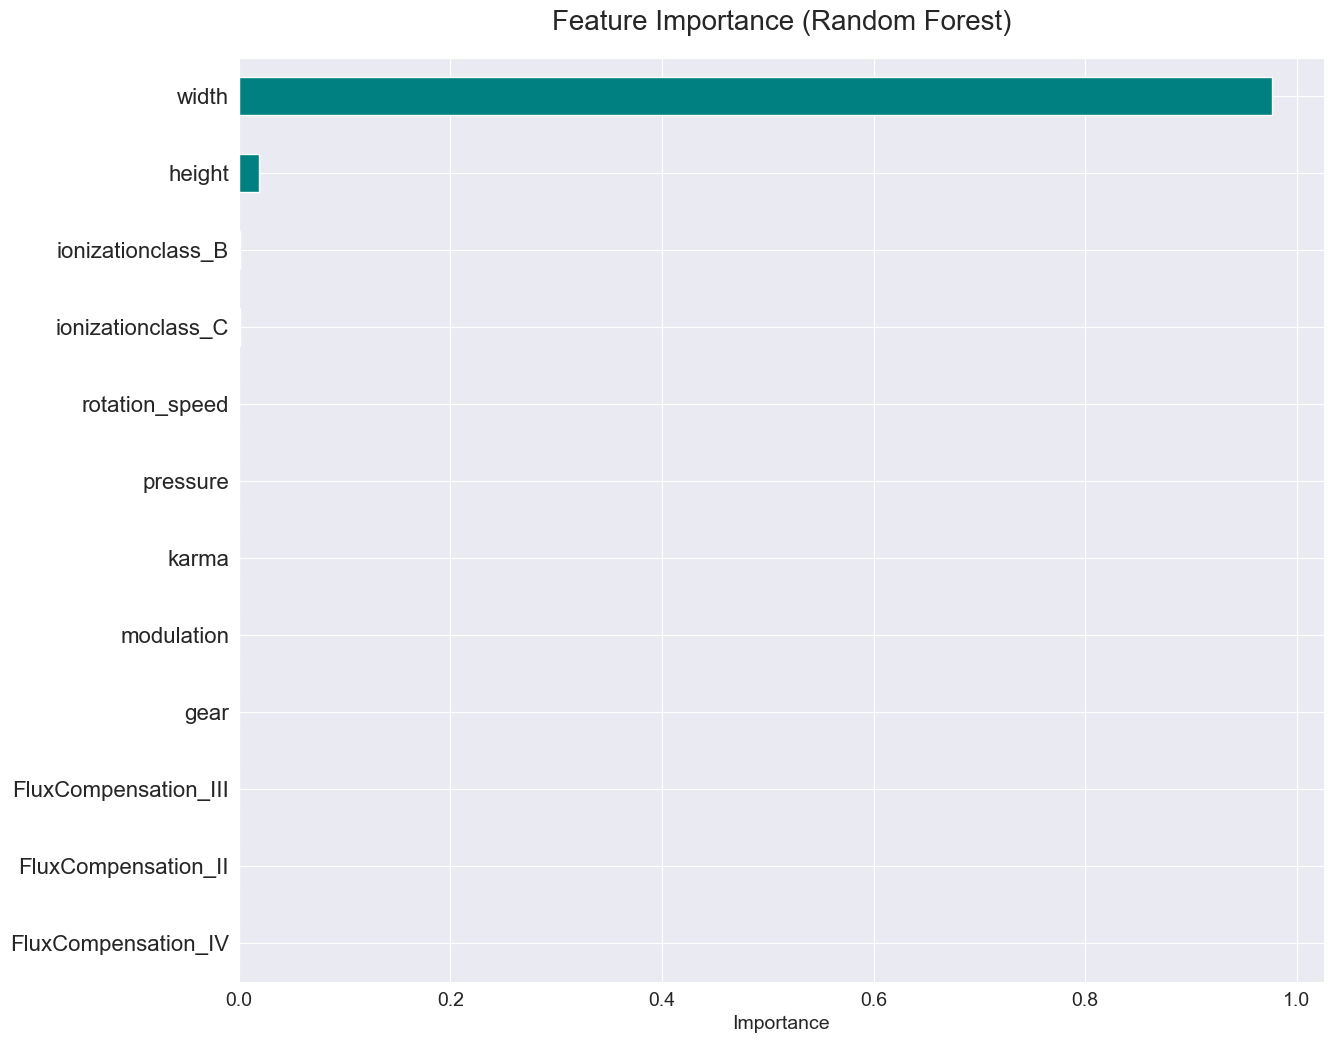

In [77]:
sns.set_style('darkgrid')

f_importances = rf_regressor.feature_importances_
f_importances = pd.Series(f_importances, index = X.columns)

f_importances = f_importances.sort_values(ascending = True)

# PLotting

plt.figure(figsize = (14,12))
f_importances.plot(kind = 'barh', color = 'teal')
plt.xlabel('Importance', fontsize = 14)
plt.title('Feature Importance (Random Forest)', pad = 20.0, fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 16)
plt.show()

**This plot confirms that width and height of the input materials are the most critical factors in determining the product weight.**

<hr>

**Actual vs Predicted**

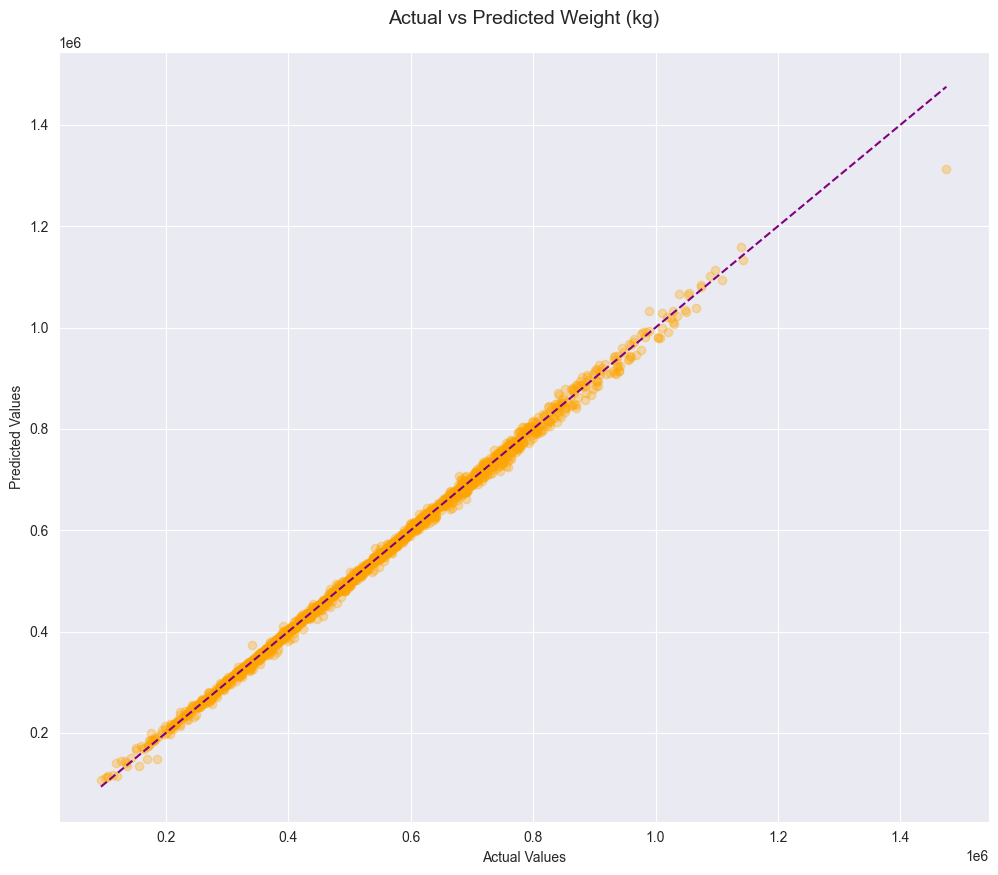

In [86]:
sns.set_style('dark')

plt.figure(figsize = (12,10))
plt.scatter(Y_test, Y_predicted, alpha = 0.3, color = 'orange')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color = 'purple', linestyle = '--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Weight (kg)', fontsize = 14, pad = 20.0)
plt.grid(True)
plt.show()

**This plot visually confirms the high $R^2$ score ($0.9978$). The points cluster extremely tightly around the purple dashed line (which represents perfect prediction), showing that the model's predictions are highly accurate across the entire range of weights.**

<hr>

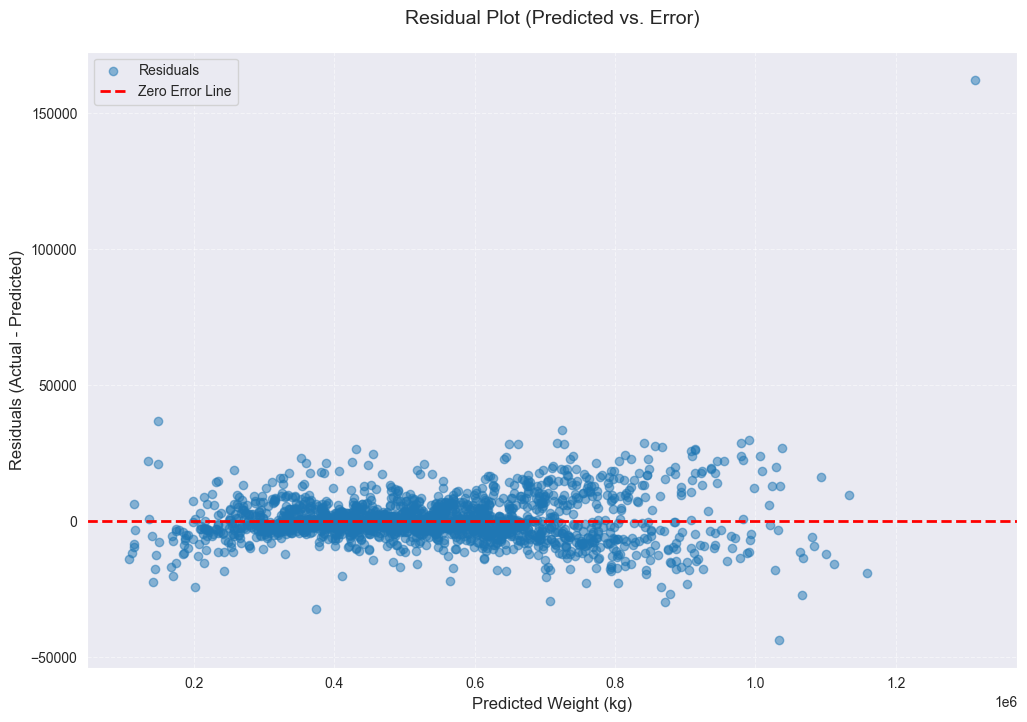

In [101]:
# Residual Plot

sns.set_style('darkgrid')

# Calculate residuals (error)
residuals = Y_test - Y_predicted

plt.figure(figsize = (12, 8))

# Scatter of predicted vs residuals
plt.scatter(Y_predicted, residuals, alpha = 0.5, label = 'Residuals')

# Horizontal line at 0 error (ideal Residual should be zero)
plt.axhline(0, color='red', linestyle='--', linewidth = 2, label = 'Zero Error Line')

# Titles and labels
plt.title('Residual Plot (Predicted vs. Error)', fontsize = 14, pad = 20.0)
plt.xlabel('Predicted Weight (kg)', fontsize = 12)
plt.ylabel('Residuals (Actual - Predicted)', fontsize = 12)

# Grid + legend
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

plt.show()


This plot indicates that:

No Bias: The model is not over- or under-predicting the weight at any specific level nd not in a systematic way. (without any pattern, which is good). No visible pattern (slope or curve) which means the model is not biased.

Good Fit: The errors are small across the entire range of predicted outputs.

<hr>

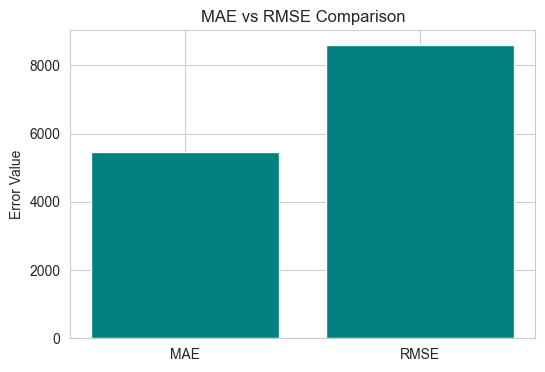

In [92]:
# MAE and RMSE Plots

metrics = ['MAE', 'RMSE']
values = [MAE, RMSE]

plt.figure(figsize=(6,4))
plt.bar(metrics, values, color = 'Teal')
plt.ylabel("Error Value")
plt.title("MAE vs RMSE Comparison")
plt.show()

- MAE ($5,453$ kg): the average absolute error.
- RMSE ($8,601$ kg): Is is higher than MAE because larger errors are more heavily penalized when they are squared.

<hr>